In [627]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import os # need for file enumeration
import random
from sklearn.model_selection import train_test_split


# CNN
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization,LeakyReLU
from tensorflow.keras.regularizers import l2
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras import utils,losses
# pre-trained
from tensorflow.keras.applications import VGG19,EfficientNetB4


import tensorflow as tf

# some more image preprocessing
# from tensorflow.keras.layers import RandomBrightness, RandomContrast, RandomCrop, RandomFlip
# from tensorflow.keras.layers import RandomHeight, RandomRotation, RandomTranslation
# from tensorflow.keras.layers import RandomWidth, RandomZoom

# import skimage
# import cv2
# from PIL.ExifTags import TAGS
# from PIL import ExifTags
# from PIL import Image

# from os import listdir
# from os.path import isfile, join

# import keras.applications

# metrics
# from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay, confusion_matrix

#
import gc

# reloads module to update
import universal_methods
import importlib
importlib.reload(universal_methods)
# .py file with universal methods, that I use more than one time in this project
from universal_methods import Universal

# For reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

## Data Acquisition

In [5]:
X,y,class_labels=Universal().get_images()
class_labels

Found 2041 images belonging to 2 classes.


['fake', 'real']

<Figure size 432x288 with 0 Axes>

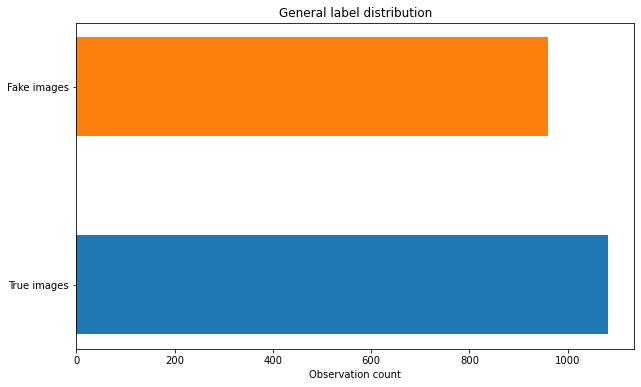

In [27]:
Universal().plot_proportions(y,"General label distribution")

- Simple model
-- Review, features, gradient, plan of model
- Pretrained model
-- Review, features, gradient, plan of model
- Pretrained model 2
-- Review, features, gradient, plan of model
- Simple model on easy dataset
-- Review, features, gradient, plan of model
- Simple model categorical
-- Review, features, gradient, plan of model
- Pretrained model categorical
-- Review, features, gradient, plan of model


Train-val-test split and shapes check

In [19]:
X_train_temp,X_test,y_train_temp,y_test=train_test_split(X,y,random_state=42,stratify=y,test_size=0.1)
X_train,X_val,y_train,y_val=train_test_split(X_train_temp,y_train_temp,random_state=42,stratify=y_train_temp,test_size=0.11)
X_train.shape,y_train.shape,X_val.shape,y_val.shape, X_test.shape,y_test.shape

((1634, 600, 600, 3),
 (1634,),
 (202, 600, 600, 3),
 (202,),
 (205, 600, 600, 3),
 (205,))

Plot of classes proportion

<Figure size 432x288 with 0 Axes>

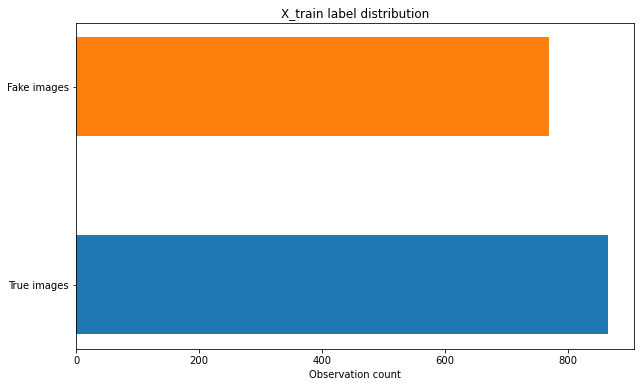

In [28]:
Universal().plot_proportions(y_train,"X_train label distribution")

<Figure size 432x288 with 0 Axes>

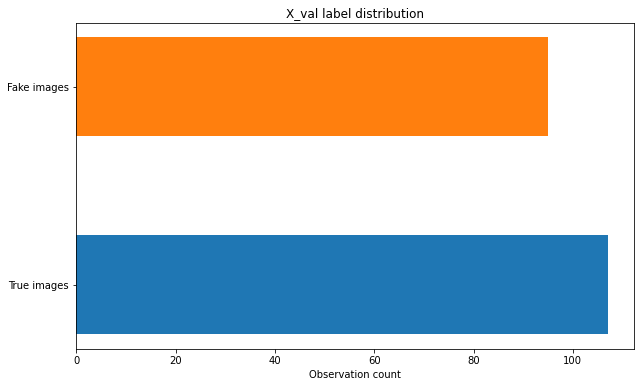

In [29]:
Universal().plot_proportions(y_val,"X_val label distribution")

<Figure size 432x288 with 0 Axes>

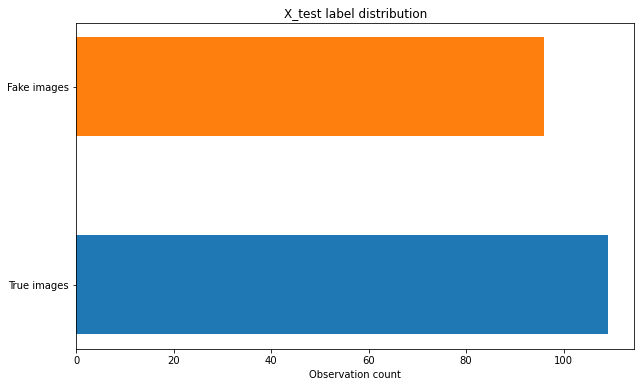

In [30]:
Universal().plot_proportions(y_test,"X_test label distribution")

## Modeling
----
##### Simple model 
First of all let's try to run our data through simple CNN.

In [54]:
# very simple CNN
model_simple = Sequential()
model_simple.add(Conv2D(filters = 8, kernel_size = (8, 8), activation = 'relu', input_shape = (600, 600, 3)))
model_simple.add(MaxPooling2D(pool_size = (3, 3)))
model_simple.add(Conv2D(filters = 8, kernel_size = (6, 6), activation = 'relu'))
model_simple.add(MaxPooling2D(pool_size = (2, 2)))
model_simple.add(Flatten())
model_simple.add(Dense(64, activation = 'relu'))
model_simple.add(Dense(1, activation = 'sigmoid'))
model_simple.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['acc'])
history_model_simple = model_simple.fit(
    X_train, y_train,
     batch_size = 32,
      epochs = 20,
       verbose = 1,
        validation_data = (X_val, y_val)
    )

Epoch 1/20


2022-11-07 21:20:23.908494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - ETA: 0s - loss: 0.6929 - acc: 0.5269

2022-11-07 21:20:41.979240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - 19s 359ms/step - loss: 0.6929 - acc: 0.5269 - val_loss: 0.6958 - val_acc: 0.5297
Epoch 2/20
52/52 [==============================] - 17s 322ms/step - loss: 0.6925 - acc: 0.5294 - val_loss: 0.6959 - val_acc: 0.5297
Epoch 3/20
52/52 [==============================] - 17s 321ms/step - loss: 0.6922 - acc: 0.5294 - val_loss: 0.6962 - val_acc: 0.5297
Epoch 4/20
52/52 [==============================] - 17s 320ms/step - loss: 0.6920 - acc: 0.5294 - val_loss: 0.6964 - val_acc: 0.5297
Epoch 5/20
52/52 [==============================] - 17s 319ms/step - loss: 0.6919 - acc: 0.5294 - val_loss: 0.6966 - val_acc: 0.5297
Epoch 6/20
52/52 [==============================] - 17s 320ms/step - loss: 0.6917 - acc: 0.5294 - val_loss: 0.6969 - val_acc: 0.5297
Epoch 7/20
52/52 [==============================] - 17s 320ms/step - loss: 0.6916 - acc: 0.5294 - val_loss: 0.6971 - val_acc: 0.5297
Epoch 8/20
52/52 [==============================] - 17s 319ms/step - loss: 0.691

2022-11-08 22:31:27.986718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 2s 140ms/step


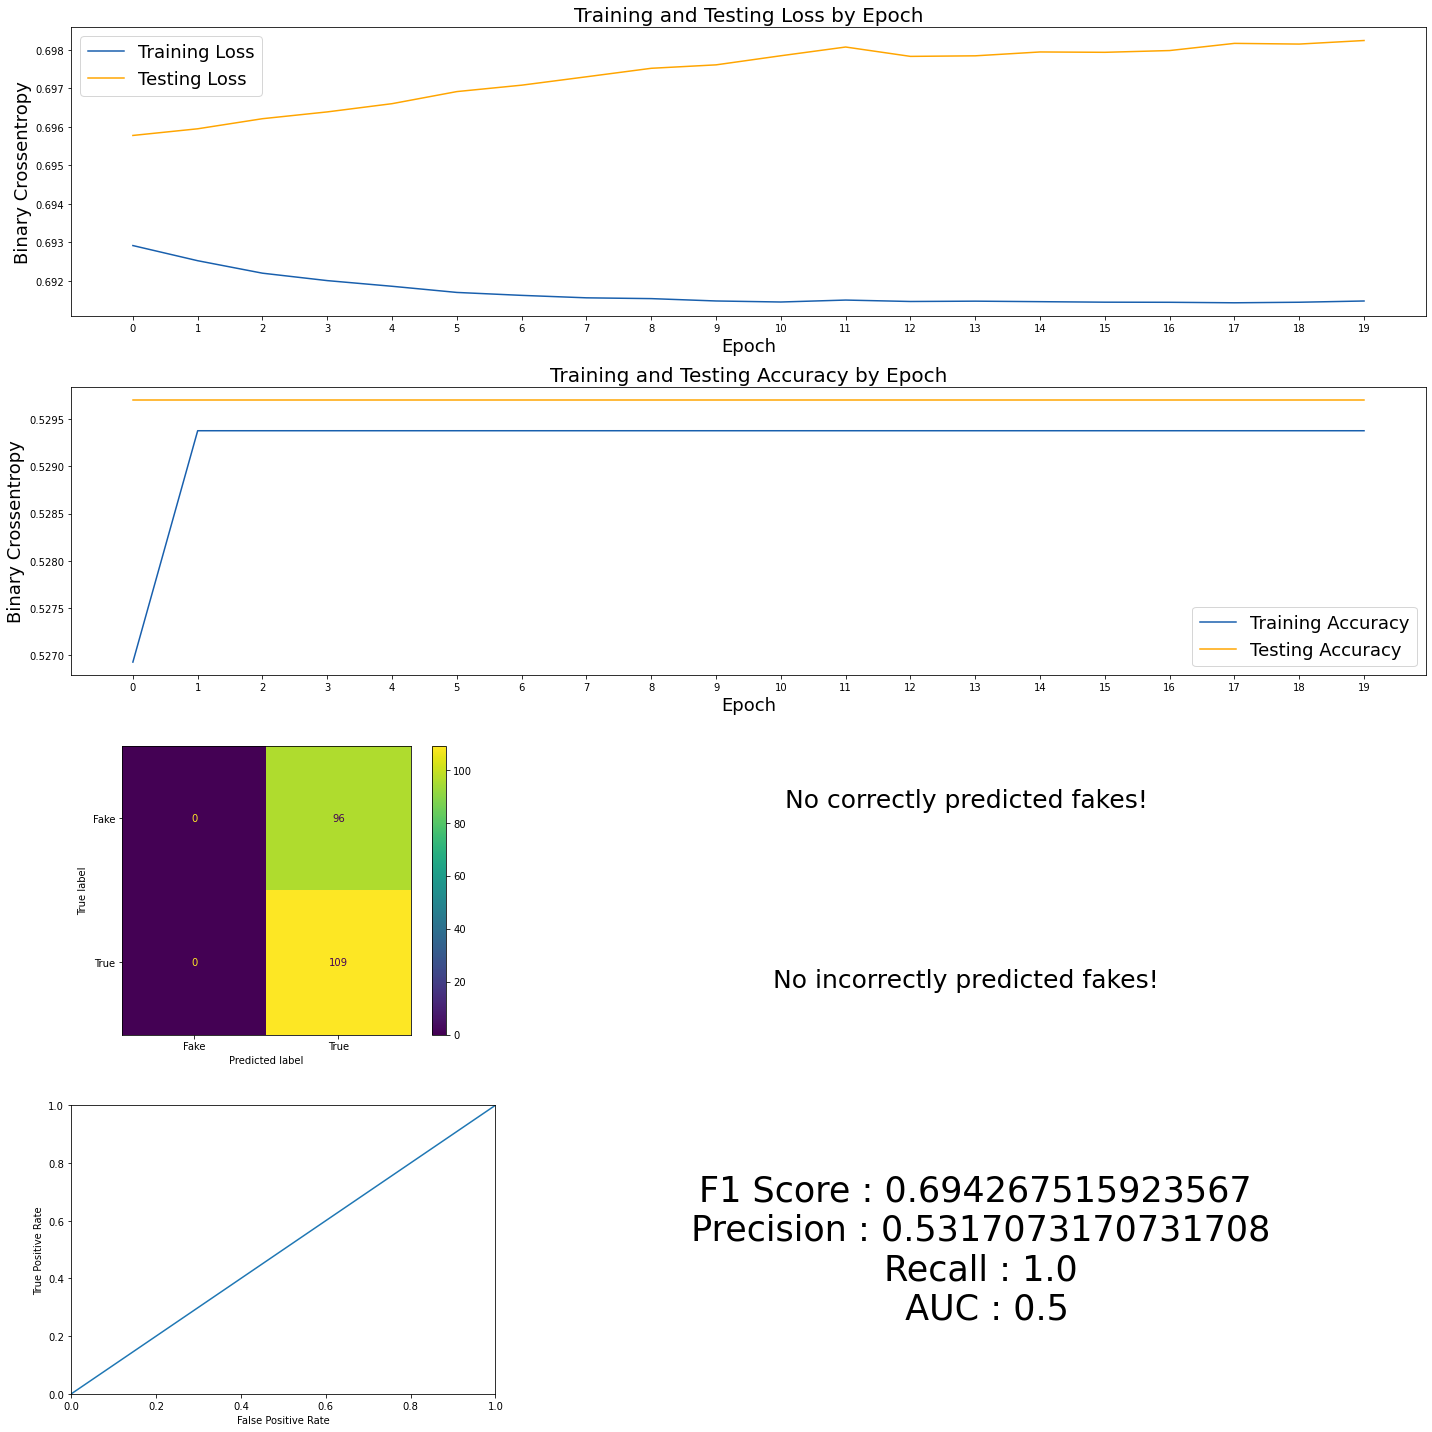

In [603]:
matches,mismatches,plot=Universal().plot_results_duo(history_model_simple,model_simple,X_test,y_test,"model_simple");

Confusion matrix shows that model cannot effectively catch the signal to correctly recognize and predict fakes. 
Test set totally contains 511 images, and model predicted that 486 of them are true (only 256 correctly).   
And predicted 25 fakes in total, and only 10 correctly.  

On the plot there are two sets of false positives and false negatives. It is not clear, why model caught exactly these images and missed others. My guess is because of some similarities with the training set.
ROC-AUC plot shows that true and false image sets are not just overlapping - for the model they are basically identically and it clearly doesn't learn as it should. This can be caused either by simplicity of the model, either by images which need more manipulation/augmentation to highlight their differences. To exclude model assumption, let's pass our dataset through much more powerful pre-trained model. 

[<keras.layers.convolutional.conv2d.Conv2D object at 0x2b9d60df0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x2b807c250>, <keras.layers.convolutional.conv2d.Conv2D object at 0x50824df10>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x2b6b6ae80>, <keras.layers.reshaping.flatten.Flatten object at 0x178651e50>, <keras.layers.core.dense.Dense object at 0x17873b7c0>, <keras.layers.core.dense.Dense object at 0x2bce2ea60>]


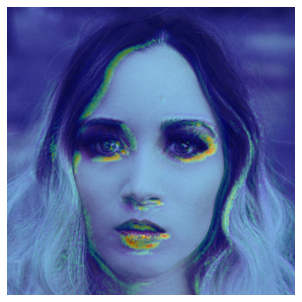

In [625]:
Universal().get_conv(model_simple,X_test[6],"model_simple_grad",alpha=0.4)

1/1 [==============================] - 0s 145ms/step


2022-11-08 22:45:17.925149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

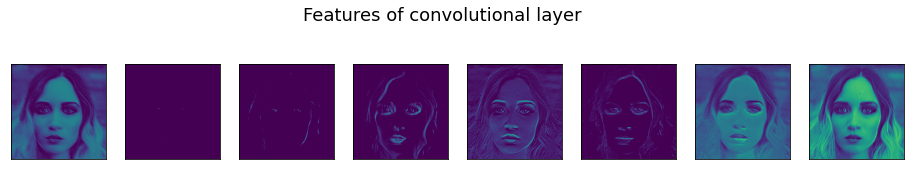

In [631]:
Universal().get_feat(model_simple,X_test[6],layer_num=0,savename="model_simple_features_conv_0");

1/1 [==============================] - 0s 178ms/step


2022-11-08 22:44:18.652377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

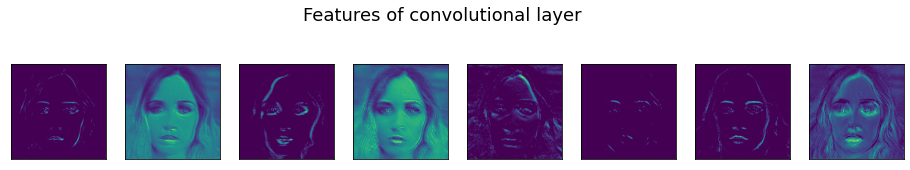

In [629]:
Universal().get_feat(model_simple,X_test[6],layer_num=2,savename="model_simple_features_conv_2");

Here are example of feature for correctly and incorrectly predicted fakes. These plots show how model's convolution layer sees images and what actual part of images are used for training

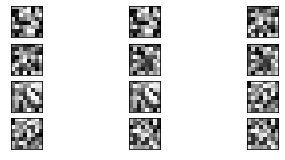

In [632]:
Universal().get_filters(model_simple,0,savename="model_simple_filters_conv_0")

In [52]:
# free-up memory
del model_simple
gc.collect()
tf.keras.backend.clear_session()

----

##### Pre-trained model

In [415]:
pretrained_model = VGG19(input_shape=[600,600,3], include_top=False,weights="imagenet")
pretrained_model.trainable = False;

In [416]:
model_trans=Sequential()
model_trans.add(pretrained_model)
model_trans.add(Flatten())

model_trans.add(Dense(128,activation="relu"))
model_trans.add(Dense(64,activation="relu"))
model_trans.add(Dense(1,activation="softmax"))
model_trans.compile(loss="binary_crossentropy",optimizer='adam',metrics=['acc'])
history_cnn_trans=model_trans.fit(X_train,y_train,batch_size=16,validation_data=(X_val,y_val),epochs=10,verbose=1)


Epoch 1/10


2022-11-08 18:10:25.016113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 1.2131 - acc: 0.5294

2022-11-08 18:12:30.526689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 142s 1s/step - loss: 1.2131 - acc: 0.5294 - val_loss: 0.7457 - val_acc: 0.5297
Epoch 2/10
103/103 [==============================] - 136s 1s/step - loss: 0.7227 - acc: 0.5294 - val_loss: 0.6983 - val_acc: 0.5297
Epoch 3/10
103/103 [==============================] - 140s 1s/step - loss: 0.7172 - acc: 0.5294 - val_loss: 0.7015 - val_acc: 0.5297
Epoch 4/10
103/103 [==============================] - 137s 1s/step - loss: 0.7176 - acc: 0.5294 - val_loss: 0.7501 - val_acc: 0.5297
Epoch 5/10
103/103 [==============================] - 137s 1s/step - loss: 0.7256 - acc: 0.5294 - val_loss: 0.7068 - val_acc: 0.5297
Epoch 6/10
103/103 [==============================] - 138s 1s/step - loss: 0.7048 - acc: 0.5294 - val_loss: 0.7066 - val_acc: 0.5297
Epoch 7/10
103/103 [==============================] - 138s 1s/step - loss: 0.7140 - acc: 0.5294 - val_loss: 0.8187 - val_acc: 0.5297
Epoch 8/10
103/103 [==============================] - 138s 1s/step - loss: 0.718

2022-11-08 22:32:11.570512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 19s 3s/step


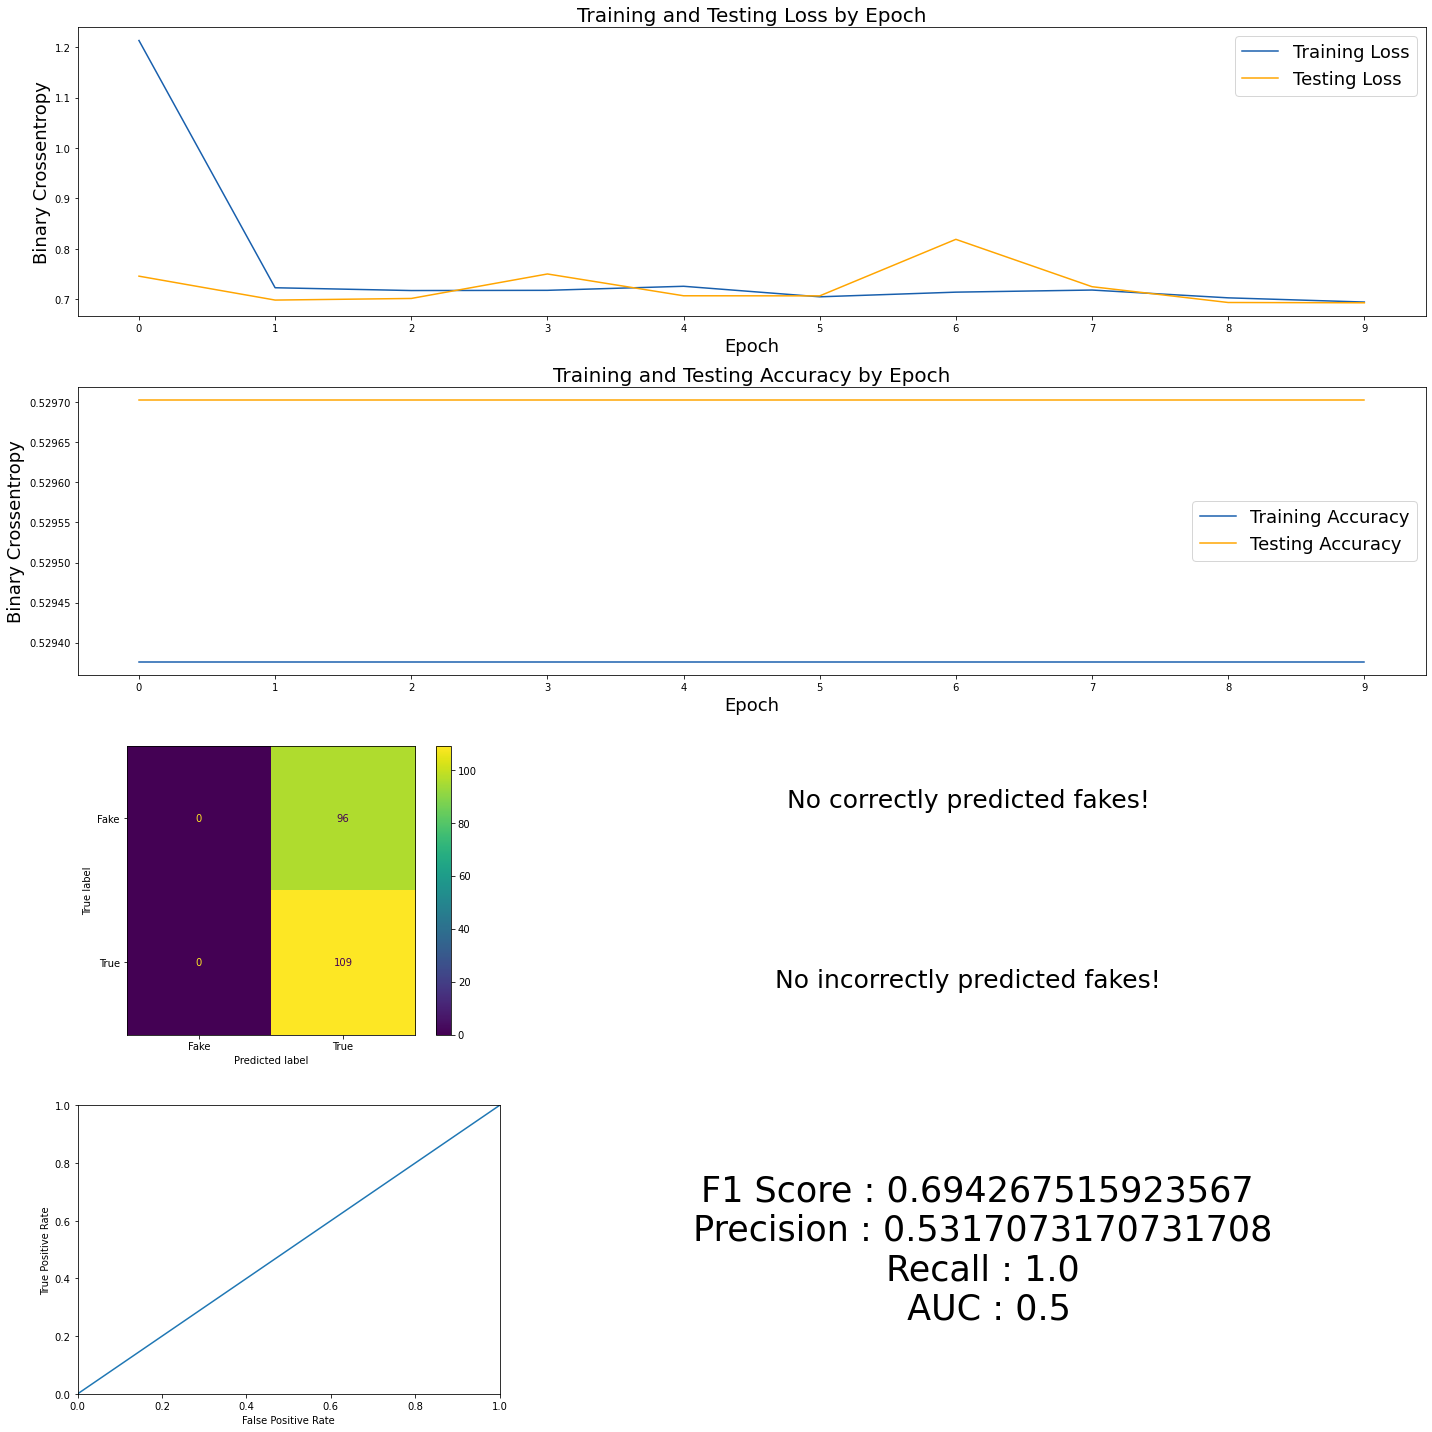

In [604]:
matches_2,mismatches_2, plot=Universal().plot_results_duo(history_cnn_trans,model_trans,X_test,y_test,"VGG");

----
##### Pretrained model 2

As second pre-trained model, I'll use EfficientNetB4, it was used by a lot of Kaggle and Facebook competition winners. It has input size 380x380 and method for data acquisition is capable to generate different size images dataset.

In [436]:
X_380,y_380,class_labels=Universal().get_images(size=150)
class_labels

Found 2041 images belonging to 2 classes.


['fake', 'real']

In [437]:
X_train_temp_380,X_test_380,y_train_temp_380,y_test_380=train_test_split(X_380,y_380,random_state=42,stratify=y_380,test_size=0.1)
X_train_380,X_val_380,y_train_380,y_val_380=train_test_split(X_train_temp_380,y_train_temp_380,random_state=42,stratify=y_train_temp_380,test_size=0.11)
X_train_380.shape,y_train_380.shape,X_val_380.shape,y_val_380.shape, X_test_380.shape,y_test_380.shape

((1634, 150, 150, 3),
 (1634,),
 (202, 150, 150, 3),
 (202,),
 (205, 150, 150, 3),
 (205,))

In [438]:
pretrained_model_eff_net = EfficientNetB4(include_top=False, weights='imagenet',input_shape=(150,150,3))
pretrained_model_eff_net.trainable=False



In [439]:
model_trans_eff=Sequential()
model_trans_eff.add(pretrained_model_eff_net)
model_trans_eff.add(Flatten())
model_trans_eff.add(Dense(128,activation="relu"))
model_trans_eff.add(Dense(64,activation="relu"))
model_trans_eff.add(Dense(1,activation="sigmoid"))
model_trans_eff.compile(loss="binary_crossentropy",optimizer='adam',metrics=['acc'])
history_cnn_trans_eff=model_trans_eff.fit(X_train_380,y_train_380,batch_size=16,validation_data=(X_val_380,y_val_380),epochs=10,verbose=1)


Epoch 1/10


2022-11-08 20:17:56.905261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - ETA: 0s - loss: 1.3287 - acc: 0.4939

2022-11-08 20:18:22.287152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 47s 315ms/step - loss: 1.3287 - acc: 0.4939 - val_loss: 0.7914 - val_acc: 0.5297
Epoch 2/10
103/103 [==============================] - 11s 108ms/step - loss: 0.8758 - acc: 0.5018 - val_loss: 1.1156 - val_acc: 0.4703
Epoch 3/10
103/103 [==============================] - 10s 100ms/step - loss: 0.8266 - acc: 0.5202 - val_loss: 0.7108 - val_acc: 0.5297
Epoch 4/10
103/103 [==============================] - 11s 105ms/step - loss: 0.7835 - acc: 0.5141 - val_loss: 0.8720 - val_acc: 0.5297
Epoch 5/10
103/103 [==============================] - 11s 108ms/step - loss: 0.7650 - acc: 0.5092 - val_loss: 0.8085 - val_acc: 0.5297
Epoch 6/10
103/103 [==============================] - 9s 88ms/step - loss: 0.7255 - acc: 0.5129 - val_loss: 0.7247 - val_acc: 0.5297
Epoch 7/10
103/103 [==============================] - 10s 93ms/step - loss: 0.6988 - acc: 0.5282 - val_loss: 1.0045 - val_acc: 0.5297
Epoch 8/10
103/103 [==============================] - 9s 87ms/step - 

2022-11-08 22:33:02.491892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 15s 974ms/step


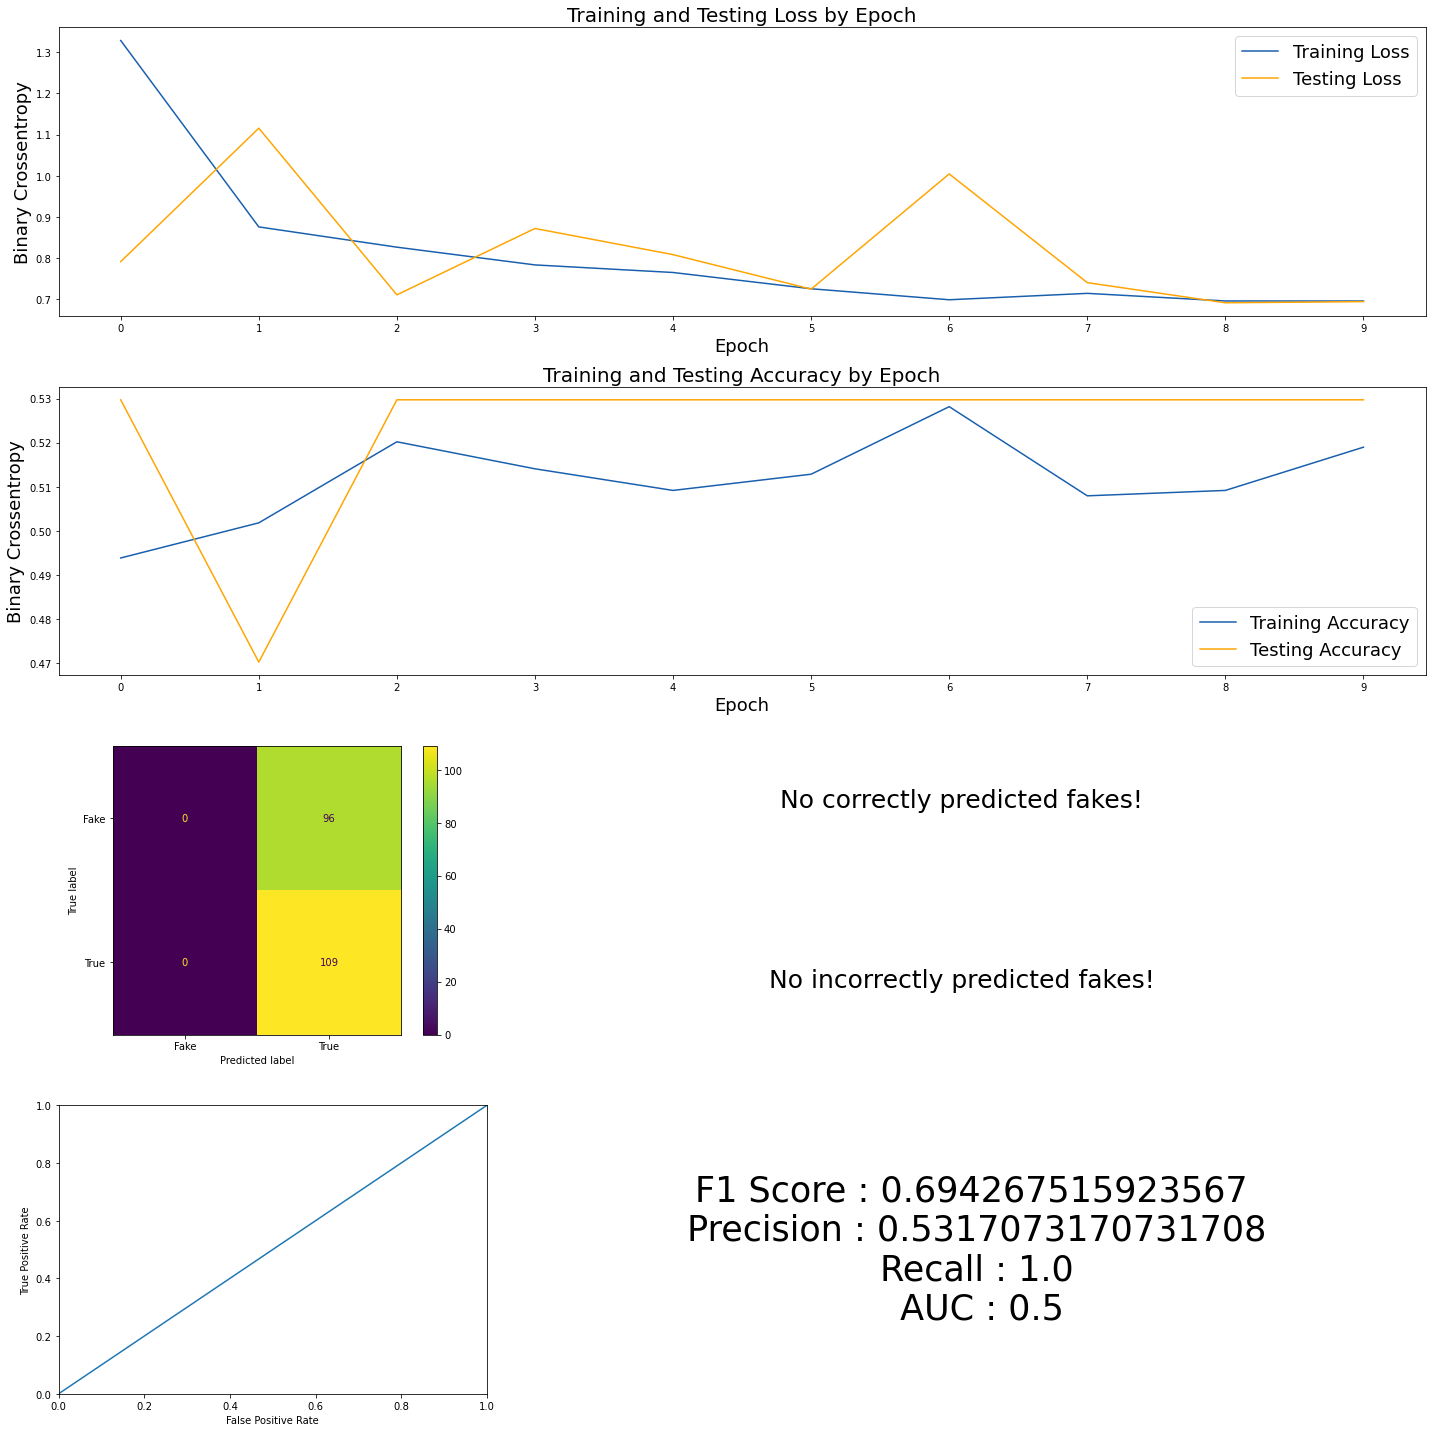

In [605]:
matches_3,mismatches_3, plot=Universal().plot_results_duo(history_cnn_trans_eff,model_trans_eff,X_test_380,y_test_380,"EfficientNetB4");

2022-11-08 20:16:36.103154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 16s 2s/step


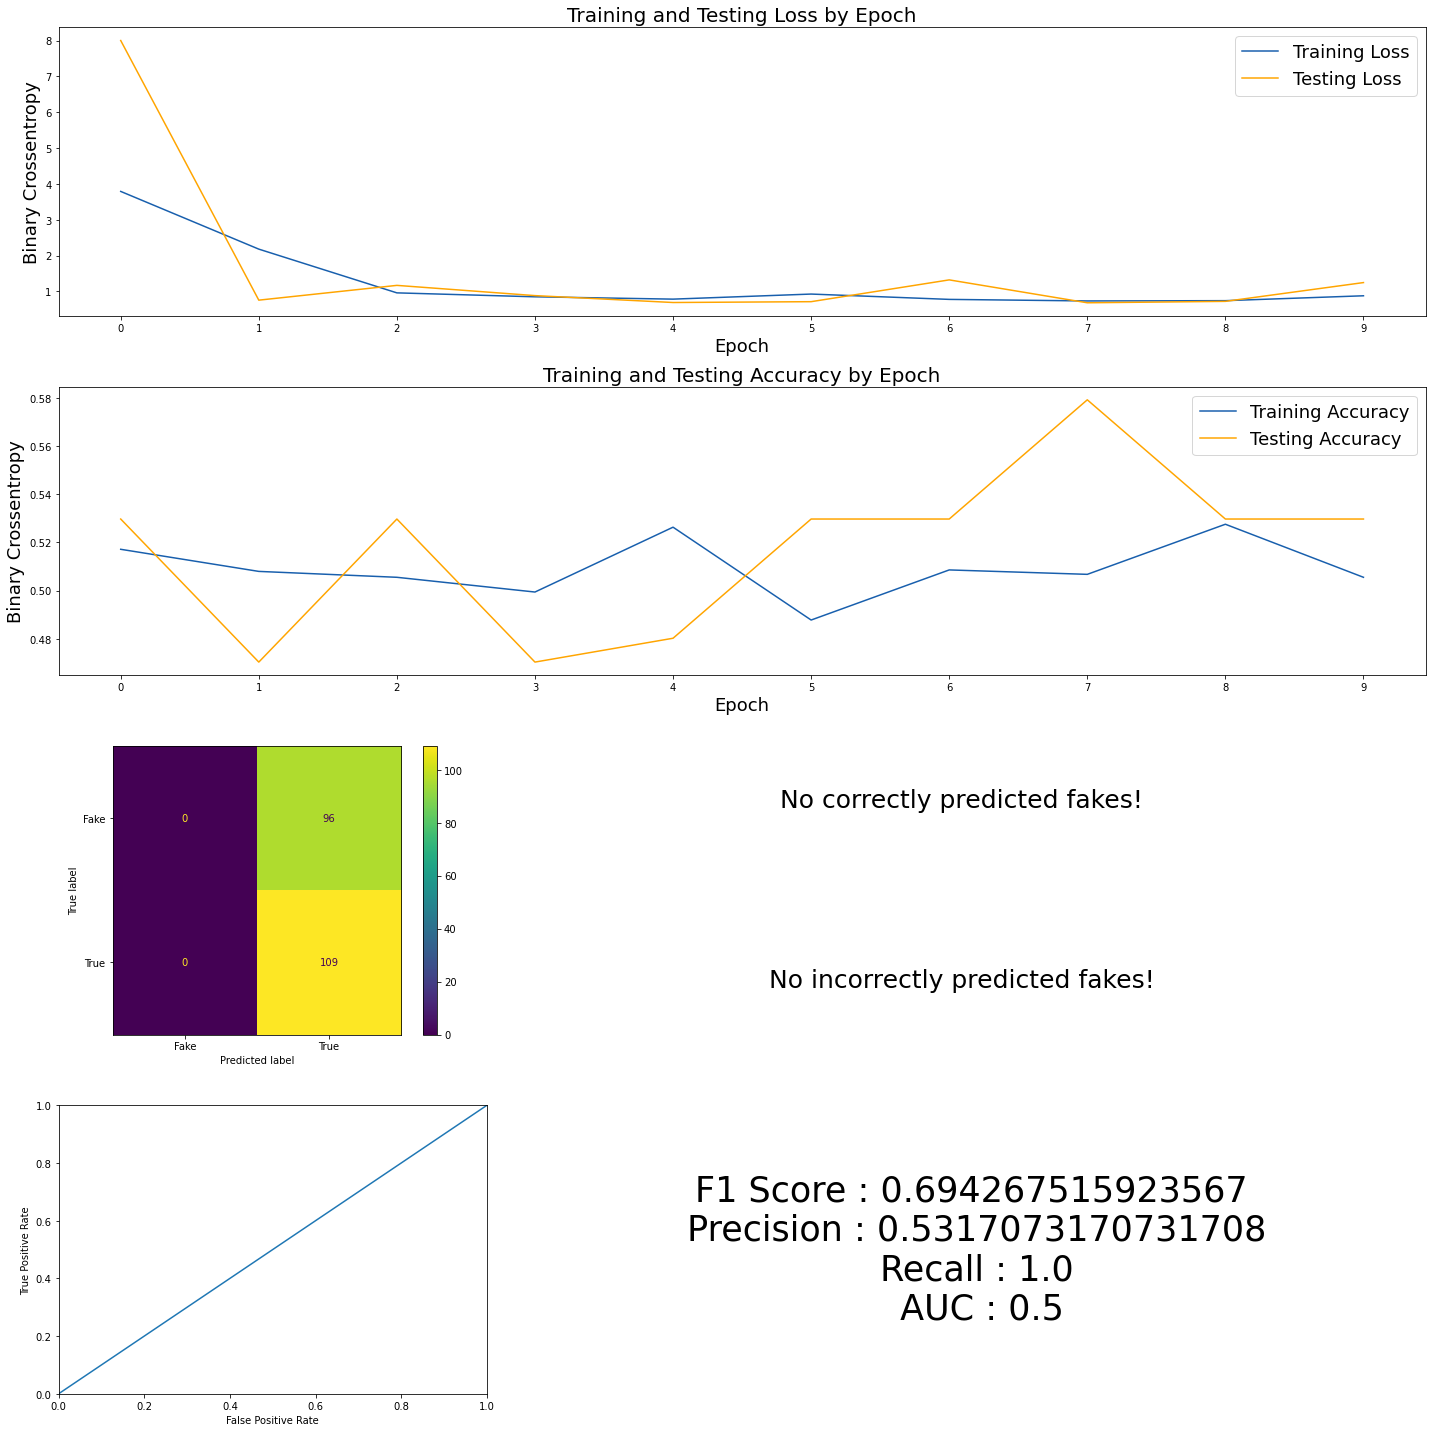

In [435]:
matches_3,mismatches_3, plot=Universal().plot_results_duo(history_cnn_trans_eff,model_trans_eff,X_test_380,y_test_380);

----
##### Modeling
https://github.com/nii-yamagishilab/MesoNet#

For some reason, neither of my models didn't catch the signal, that is why I'll try different approach, create a complicated custom model and try it on different image sizes. 

In [442]:
# from keras.models import Model as KerasModel
# from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
# from keras.optimizers import Adam

In [454]:
model_git=Sequential()
model_git.add(Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation = 'relu',use_bias=True))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_git.add(Conv2D(8, (5, 5), padding='same', activation = 'relu',use_bias=True))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_git.add(Conv2D(16, (5, 5), padding='same', activation = 'relu',use_bias=True))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_git.add(Conv2D(16, (5, 5), padding='same', activation = 'relu',use_bias=True))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
model_git.add(Flatten())
model_git.add(Dropout(0.5))
model_git.add(Dense(16,kernel_regularizer =tf.keras.regularizers.l2(l=0.01)))
model_git.add(LeakyReLU(alpha=0.1))
model_git.add(Dropout(0.5))
model_git.add(Dense(1, activation = 'sigmoid'))
model_git.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
history_git=model_git.fit(X_train_380, y_train_380, batch_size = 128, epochs = 25, verbose = 1, validation_data = (X_val_380, y_val_380))


Epoch 1/25


2022-11-08 20:39:29.229372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - ETA: 0s - loss: 1.5199 - acc: 0.4963

2022-11-08 20:39:33.125030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 6s 249ms/step - loss: 1.5199 - acc: 0.4963 - val_loss: 0.9868 - val_acc: 0.5248
Epoch 2/25
13/13 [==============================] - 1s 100ms/step - loss: 1.1561 - acc: 0.5233 - val_loss: 0.9765 - val_acc: 0.5297
Epoch 3/25
13/13 [==============================] - 1s 89ms/step - loss: 1.0792 - acc: 0.5049 - val_loss: 0.9888 - val_acc: 0.5297
Epoch 4/25
13/13 [==============================] - 1s 86ms/step - loss: 1.0373 - acc: 0.5208 - val_loss: 1.0018 - val_acc: 0.5297
Epoch 5/25
13/13 [==============================] - 1s 99ms/step - loss: 1.0121 - acc: 0.5410 - val_loss: 0.9816 - val_acc: 0.5297
Epoch 6/25
13/13 [==============================] - 1s 103ms/step - loss: 0.9887 - acc: 0.5594 - val_loss: 0.9709 - val_acc: 0.5297
Epoch 7/25
13/13 [==============================] - 1s 83ms/step - loss: 0.9685 - acc: 0.5520 - val_loss: 0.9727 - val_acc: 0.5297
Epoch 8/25
13/13 [==============================] - 1s 99ms/step - loss: 0.9402 - acc: 0.56

2022-11-08 21:52:46.214304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 47ms/step


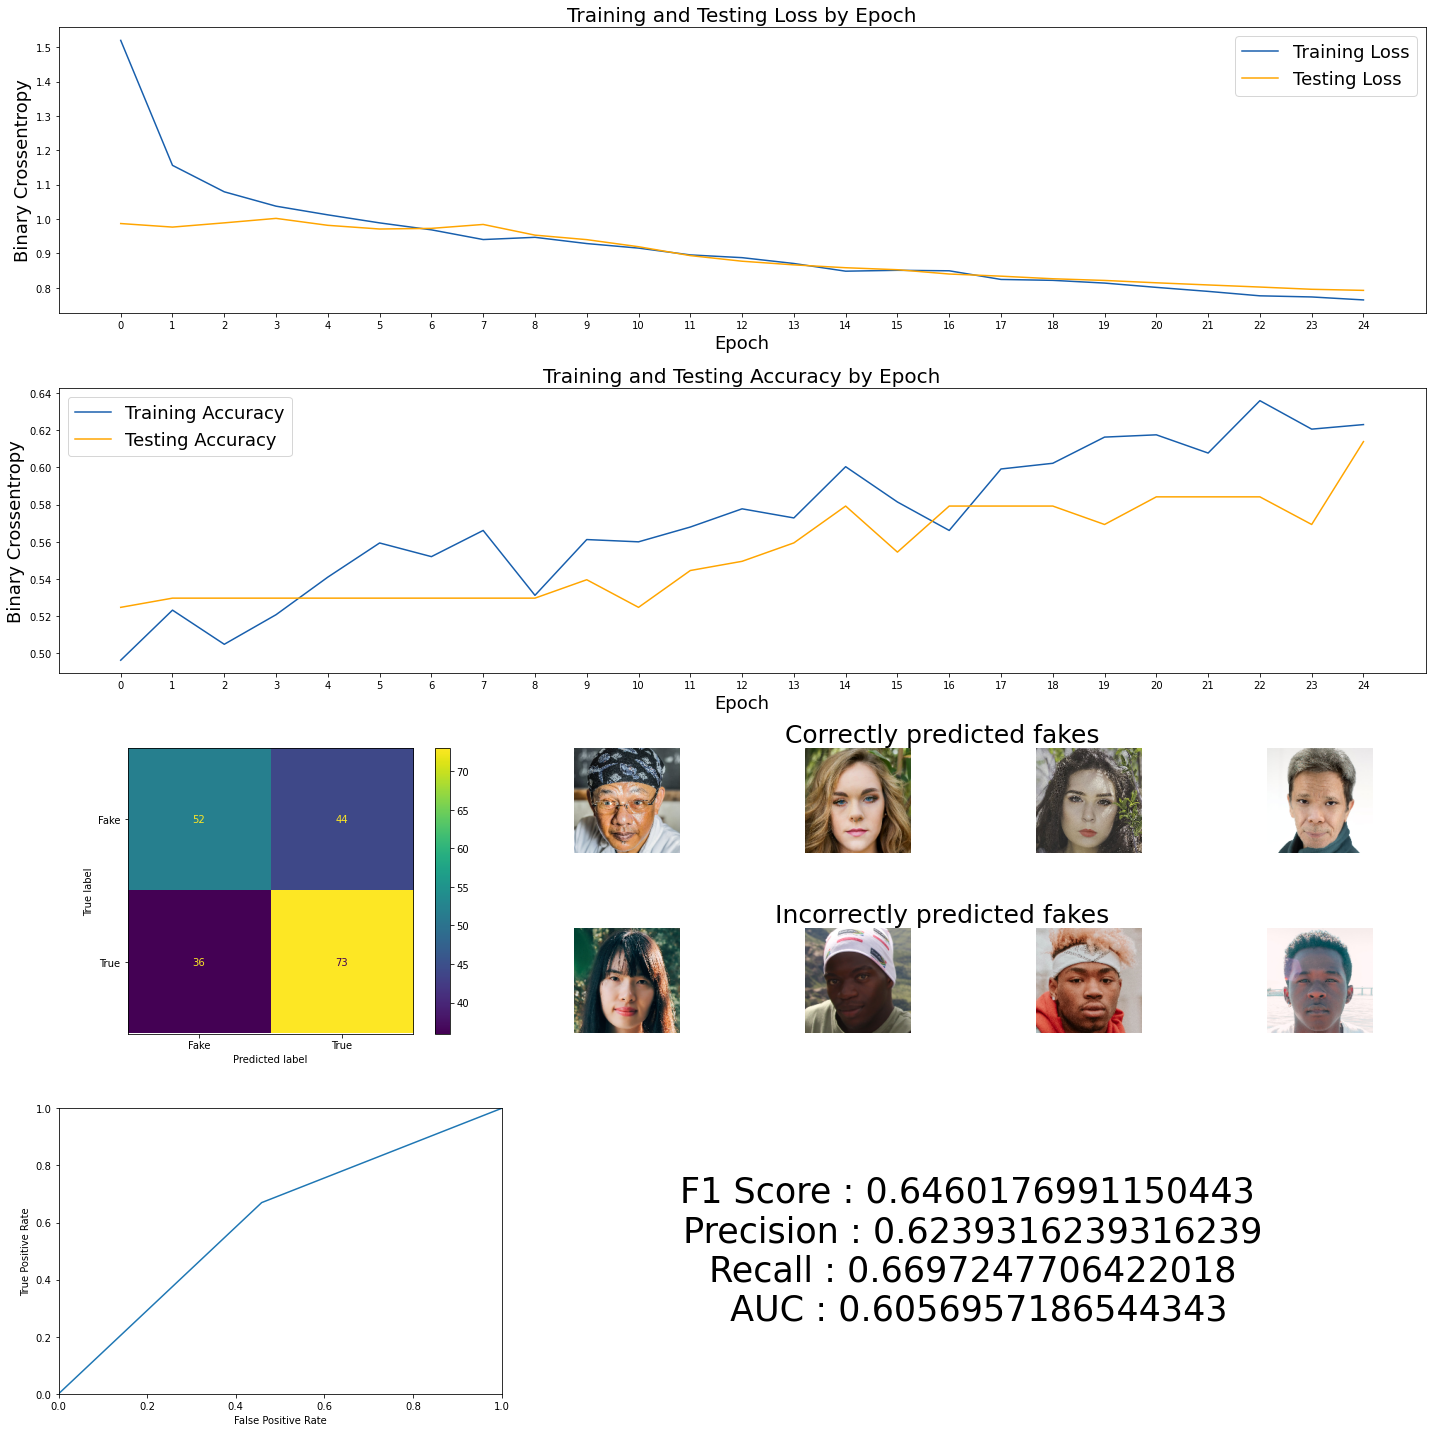

In [567]:
matches_4,mismatches_4, plot=Universal().plot_results_duo(history_git,model_git,X_test_380,y_test_380,"git_model");

2022-11-08 20:32:26.017367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 60ms/step


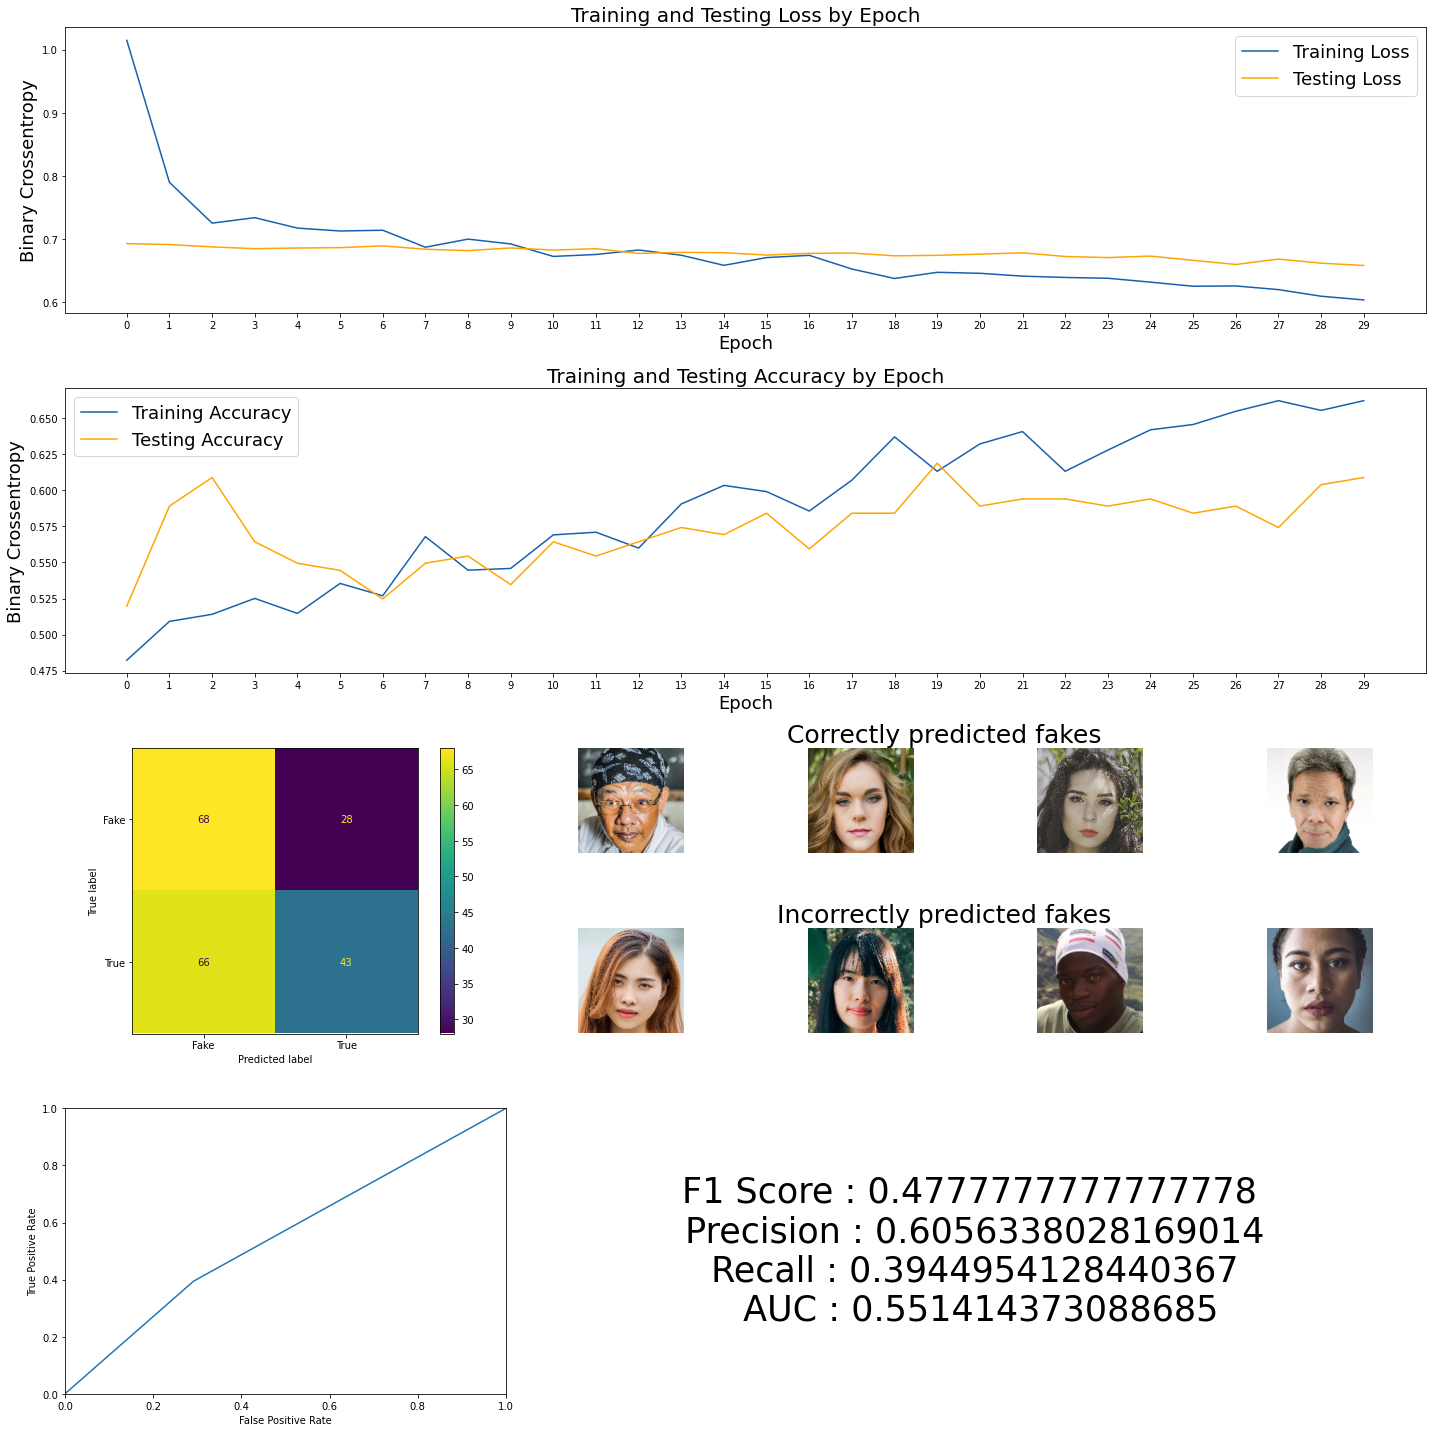

In [450]:
matches_4,mismatches_4, plot=Universal().plot_results_duo(history_git,model_git,X_test_380,y_test_380);

2022-11-08 20:30:30.525743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 43ms/step


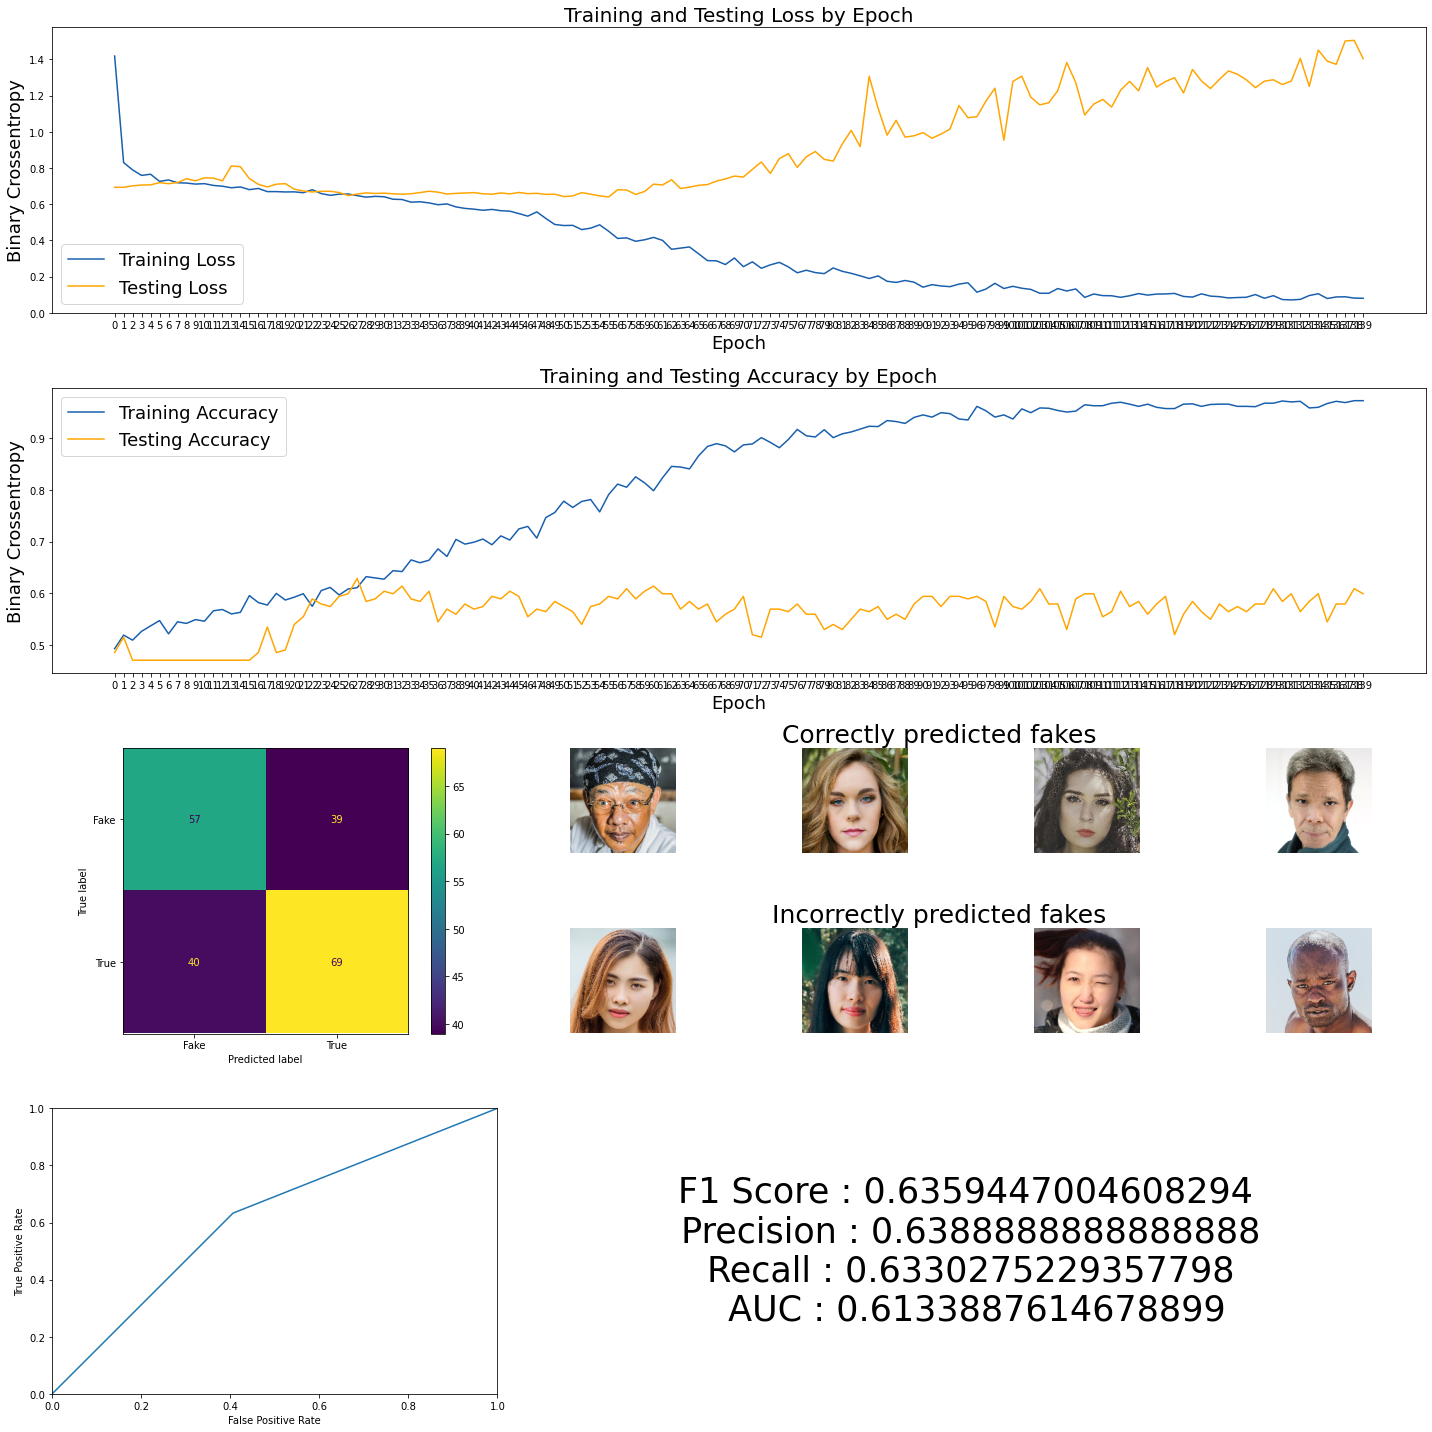

In [448]:
matches_4,mismatches_4, plot=Universal().plot_results_duo(history_git,model_git,X_test_380,y_test_380);

2022-11-08 20:27:32.796163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 97ms/step


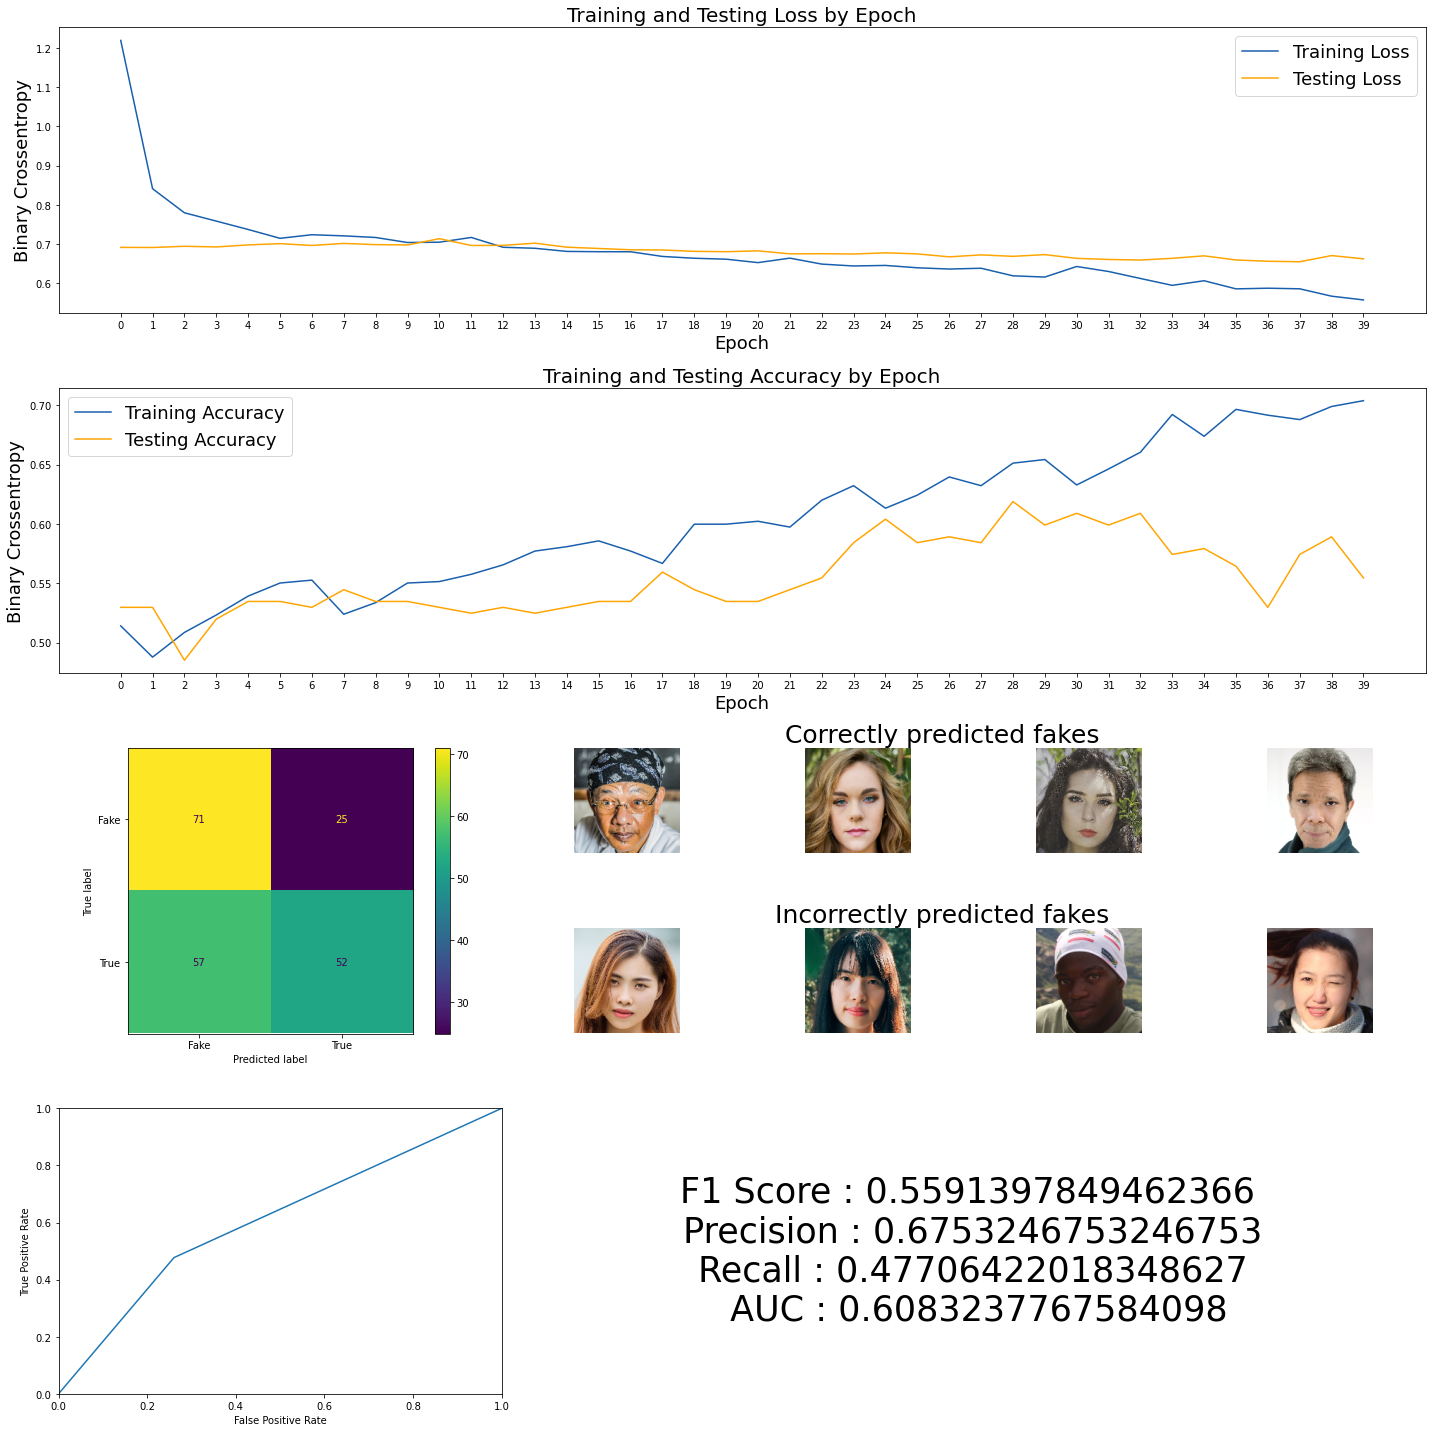

In [446]:
matches_4,mismatches_4, plot=Universal().plot_results_duo(history_git,model_git,X_test_380,y_test_380);

1/1 [==============================] - 0s 147ms/step


2022-11-08 22:45:43.600351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

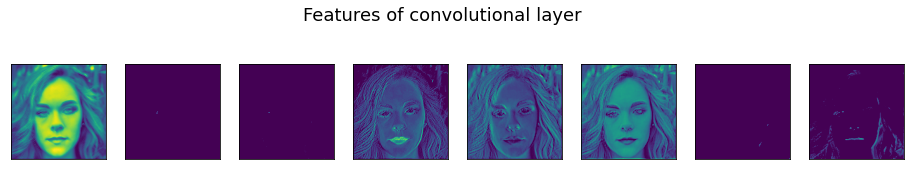

In [633]:
Universal().get_feat(model_git,X_test_380[matches_4[1]],layer_num=0,savename="model_best_features_conv_0");

1/1 [==============================] - 0s 218ms/step


2022-11-08 22:45:47.150114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

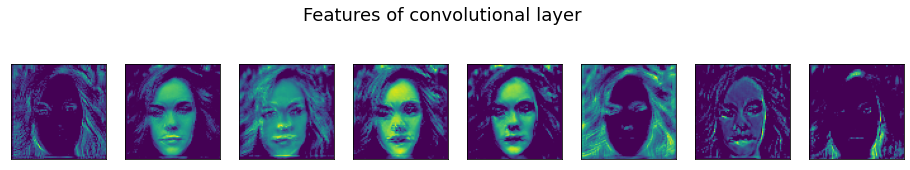

In [634]:
Universal().get_feat(model_git,X_test_380[matches_4[1]],layer_num=3,savename="model_best_features_conv_3");

2022-11-08 22:45:50.391500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 265ms/step


<Figure size 432x288 with 0 Axes>

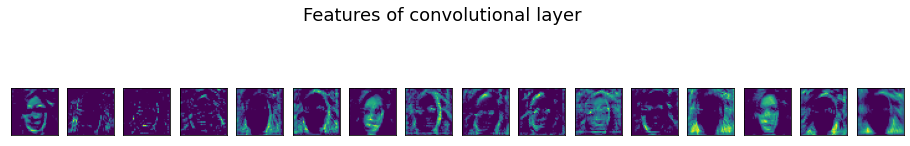

In [635]:
Universal().get_feat(model_git,X_test_380[matches_4[1]],layer_num=6,savename="model_best_features_conv_6");

1/1 [==============================] - 0s 141ms/step


2022-11-08 22:45:58.933190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

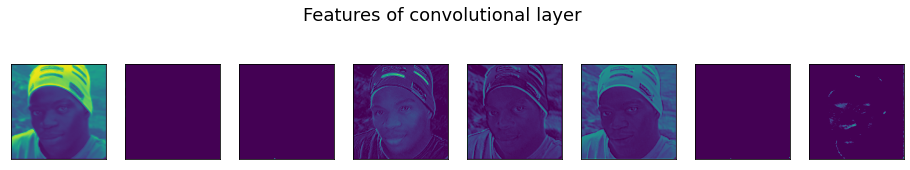

In [636]:
Universal().get_feat(model_git,X_test_380[mismatches_4[1]],0,savename="model_best_features_conv_0_mismatch");

1/1 [==============================] - 0s 247ms/step


2022-11-08 22:46:02.719536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

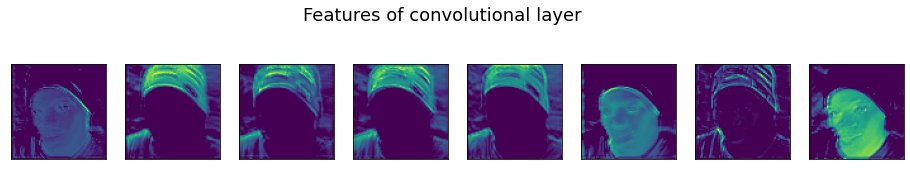

In [637]:
Universal().get_feat(model_git,X_test_380[mismatches_4[1]],3,savename="model_best_features_conv_3_mismatch");

2022-11-08 22:46:05.472129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 285ms/step


<Figure size 432x288 with 0 Axes>

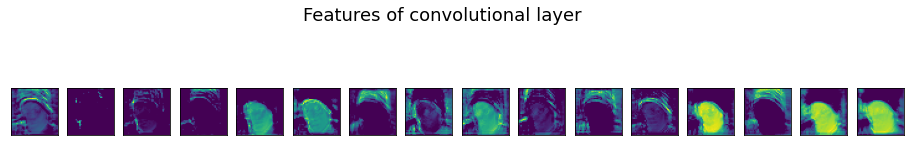

In [638]:
Universal().get_feat(model_git,X_test_380[mismatches_4[1]],6,savename="model_best_features_conv_6_mismatch");

2022-11-08 22:46:08.132492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 312ms/step


<Figure size 432x288 with 0 Axes>

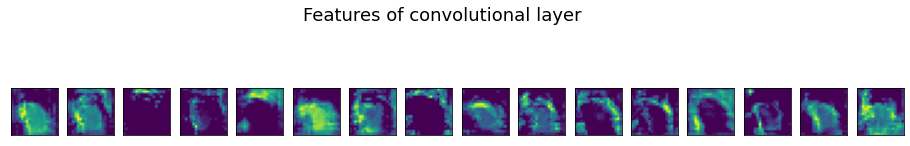

In [639]:
Universal().get_feat(model_git,X_test_380[mismatches_4[1]],9,savename="model_best_features_conv_9_mismatch");

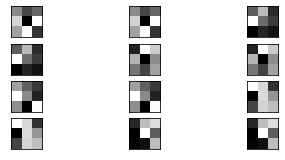

In [640]:
Universal().get_filters(model_git,0,savename="best_model_filters")

[<keras.layers.convolutional.conv2d.Conv2D object at 0x96d02c700>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x97a78c9a0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x96c379790>, <keras.layers.convolutional.conv2d.Conv2D object at 0x97c3283d0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x96c379cd0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x96d1b39d0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x96d19e730>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x96d19eb80>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x96d00a6a0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x96d00a670>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x96d19eeb0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x96d183fa0>, <keras.layers.reshaping.flatten.Flatten object at 0x96d1cea90>, <keras.layers.r

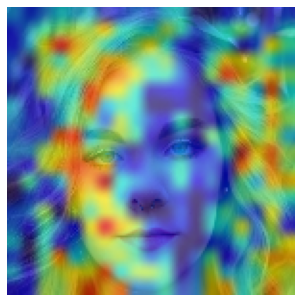

In [641]:
Universal().get_conv(model_git,X_test_380[matches_4[1]],"model_git");

Finally, we have a robust result. Difference in scores between first three models and the last one shows, that change of input images positively affected model performance. In addition, to much less time needed to process. I will use this last model as a production one. It gave me the best results and it really "catches the signal", difference between git_model and all previous definitely shows, that it is working. 
As a next step, I'll try to improve it's performance with augmentation technics.

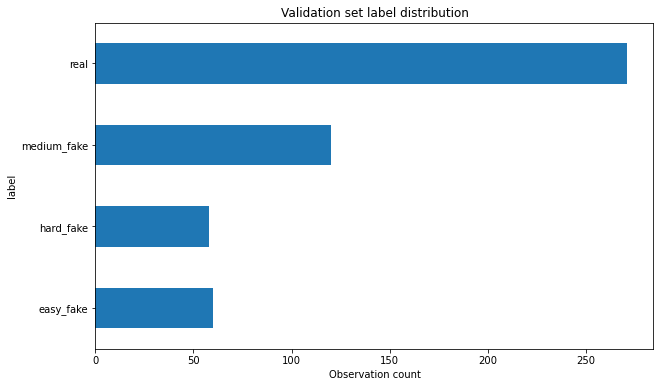

In [19]:
# how's our distribution of labels in the validation set? GABE CODE!
# plot for classes distribution of multiclass dataset.
plt.figure(figsize = (10, 6))
plt.title('Validation set label distribution')
plt.xlabel('Observation count')
val_class_labels = pd.DataFrame([class_labels[np.argmax(x)] for x in y_test], columns = ['label'])
val_class_groups = val_class_labels.groupby('label')['label'].count()
val_class_groups.plot.barh();

!!! Optimize for different metrics